In [64]:
import numpy as np
import matplotlib.pyplot as plt
import torch

import os 
import sys 
import re
from tqdm import tqdm
from joblib import Parallel, delayed

In [75]:
grid_search_fileNames = os.listdir('./save_subgroups_new/')
grid_search_filePaths = [os.path.join('./save_subgroups_new/',i) for i in grid_search_fileNames if i.find('exp1') != -1]

In [76]:
res_list = [torch.load(filePath) for filePath in tqdm(grid_search_filePaths)]

100%|██████████| 100/100 [01:18<00:00,  1.27it/s]


In [79]:
set_groups_list = []
ablate_alpha_list = []
final_test_accu = []
final_relative_metric_error = []
final_relative_ideal_point_error = []
final_relative_ideal_point_error_original = []
final_learner = []
for i in res_list:
    set_groups_list.append(i['args']['set_groups'])
    ablate_alpha_list.append(i['args']['ablate_alpha'])
    final_test_accu.append(i['train_stats']['test_accu_record'][-1])
    final_relative_metric_error.append(i['train_stats']['relative_metric_error_record'][-1])
    final_relative_ideal_point_error.append(i['train_stats']['relative_ideal_point_error_record'][-1])
    # final_relative_ideal_point_error_original.append(i['train_stats']['relative_ideal_point_error_original_record'][-1])
    # final_learner.append(i['learner'])

set_groups_list = np.array(set_groups_list)
ablate_alpha_list = np.array(ablate_alpha_list)
final_test_accu = np.array(final_test_accu)
final_relative_ideal_point_error = np.array(final_relative_ideal_point_error)
final_relative_metric_error = np.array(final_relative_metric_error)

In [83]:
ablate_groups = set_groups_list[ablate_alpha_list]
ablate_test_accu = final_test_accu[ablate_alpha_list]
ablate_final_relative_metric_error = final_relative_metric_error[ablate_alpha_list]
ablate_final_relative_ideal_point_error = final_relative_ideal_point_error[ablate_alpha_list]


no_ablate_groups = set_groups_list[ablate_alpha_list==False]
no_ablate_test_accu = final_test_accu[ablate_alpha_list==False]
no_ablate_final_relative_metric_error = final_relative_metric_error[ablate_alpha_list==False]
no_ablate_final_relative_ideal_point_error = final_relative_ideal_point_error[ablate_alpha_list==False]


In [84]:
no_ablate_groups,no_ablate_test_accu,no_ablate_final_relative_metric_error,no_ablate_final_relative_ideal_point_error = list(zip(*sorted(zip(no_ablate_groups,no_ablate_test_accu,no_ablate_final_relative_metric_error,no_ablate_final_relative_ideal_point_error))))
ablate_groups,ablate_test_accu,ablate_final_relative_metric_error,ablate_final_relative_ideal_point_error = list(zip(*sorted(zip(ablate_groups,ablate_test_accu,ablate_final_relative_metric_error,ablate_final_relative_ideal_point_error))))

Text(0, 0.5, 'test_accuracy')

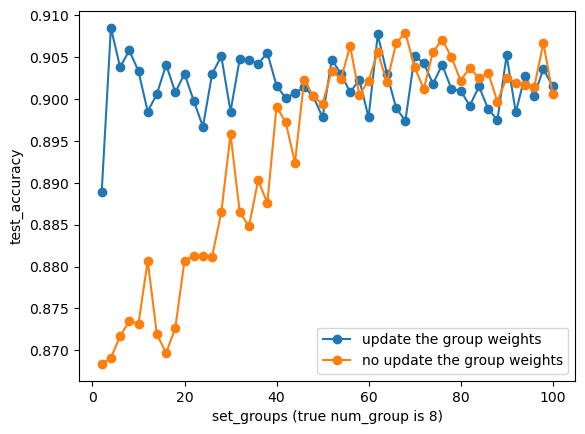

In [85]:
plt.plot(no_ablate_groups,no_ablate_test_accu, '-o', label='update the group weights')
plt.plot(ablate_groups,ablate_test_accu, '-o', label='no update the group weights')
plt.legend()
plt.xlabel('set_groups (true num_group is 8)')
plt.ylabel('test_accuracy')

Text(0, 0.5, 'relative_pseudo_ideal_point_error')

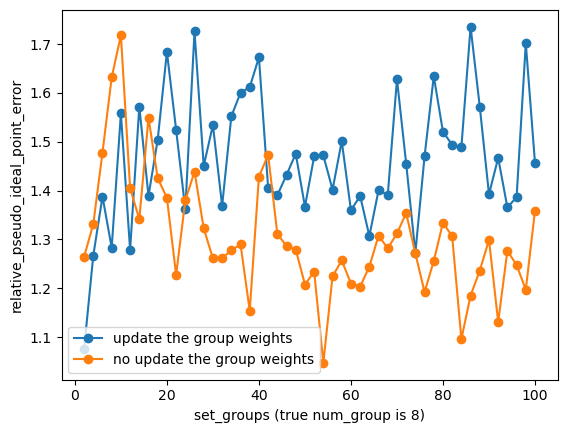

In [97]:
plt.plot(no_ablate_groups,no_ablate_final_relative_ideal_point_error, '-o', label='update the group weights')
plt.plot(ablate_groups,ablate_final_relative_ideal_point_error, '-o', label='no update the group weights')
plt.legend()
plt.xlabel('set_groups (true num_group is 8)')
plt.ylabel('relative_pseudo_ideal_point_error')

Text(0, 0.5, 'relative_metric_error')

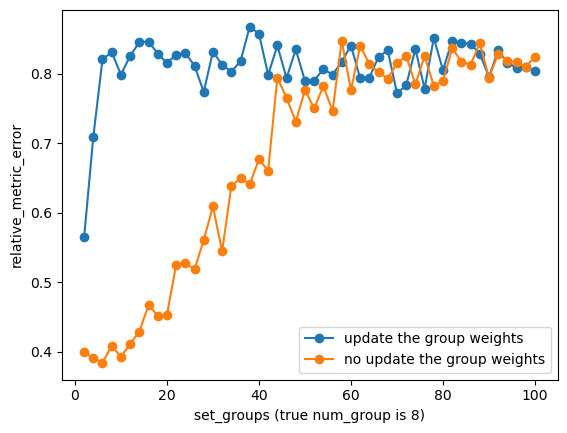

In [98]:
plt.plot(no_ablate_groups,no_ablate_final_relative_metric_error, '-o', label='update the group weights')
plt.plot(ablate_groups,ablate_final_relative_metric_error, '-o', label='no update the group weights')
plt.legend()
plt.xlabel('set_groups (true num_group is 8)')
plt.ylabel('relative_metric_error')

In [103]:
res_list[4]['args']

{'feature_dim': 10,
 'metric_rank': 10,
 'num_items': 100,
 'num_users': 50,
 'num_pairs_per_user': 500,
 'samples_per_user': 300,
 'noise_type': 'logistic',
 'noise_beta': 3,
 'num_groups': 8,
 'epochs': 200,
 'bs': 64,
 'lr': 0.005,
 'weight_decay_us': 0,
 'weight_decay_net': 0.001,
 'weight_decay_unconstrained_weight': 0,
 'optimizer_name': 'adam',
 'ablate_alpha': True,
 'ablate_m': False,
 'ablate_u': False,
 'set_groups': 8}

In [107]:
np.where(set_groups_list == 8)

(array([ 4, 52]),)

IndexError: index 6 is out of bounds for axis 0 with size 6

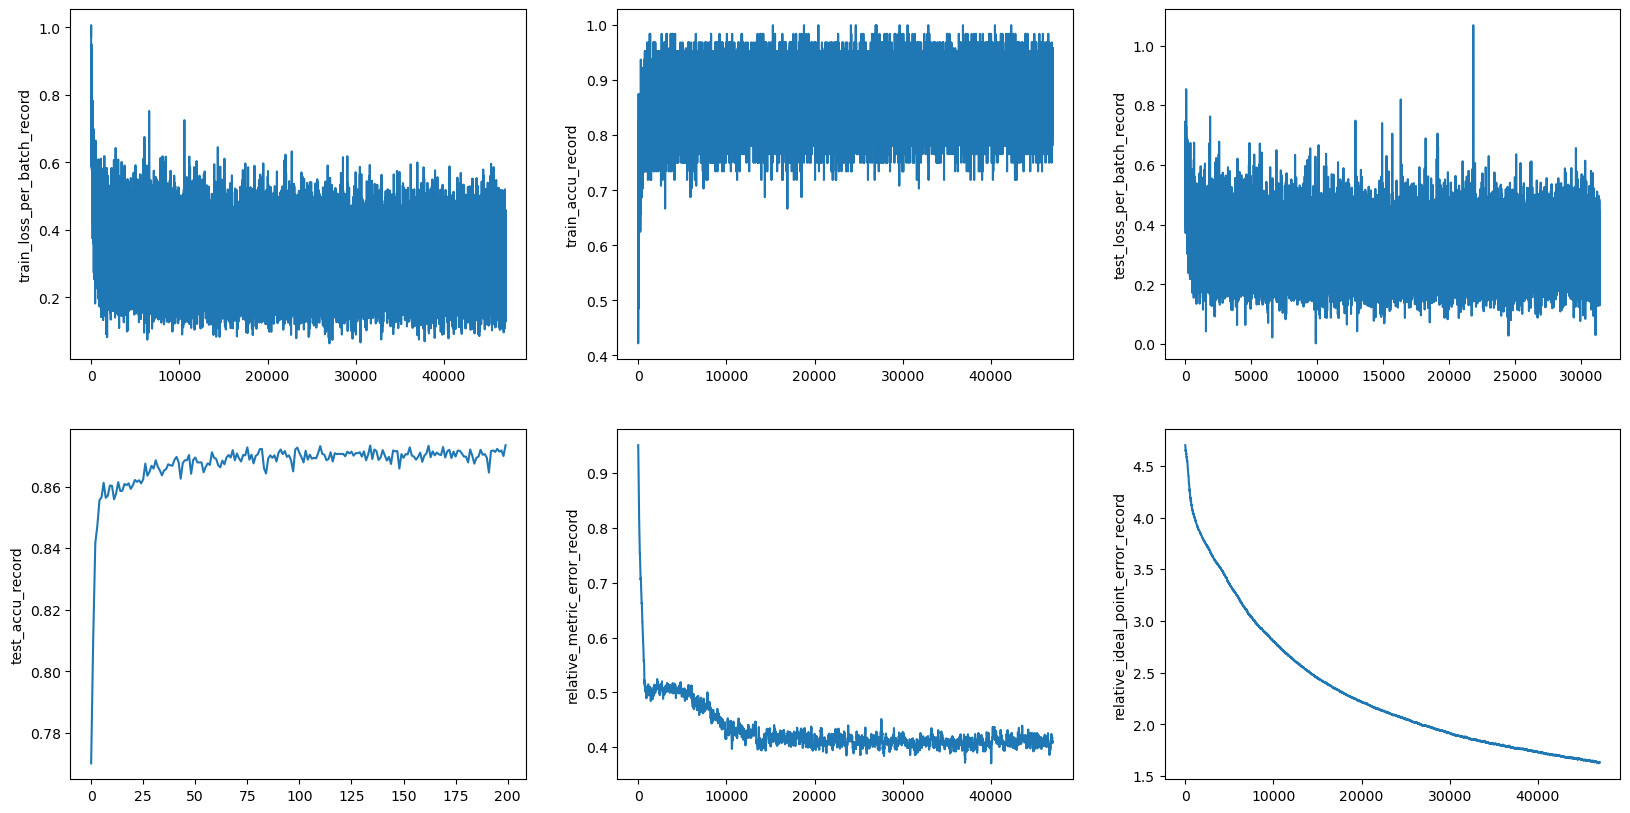

In [104]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
ax_flatten = ax.flatten()
for idx,key in enumerate(res_list[4]['train_stats']):
    ax_flatten[idx].plot(res_list[4]['train_stats'][key])
    ax_flatten[idx].set_ylabel(key)

IndexError: index 6 is out of bounds for axis 0 with size 6

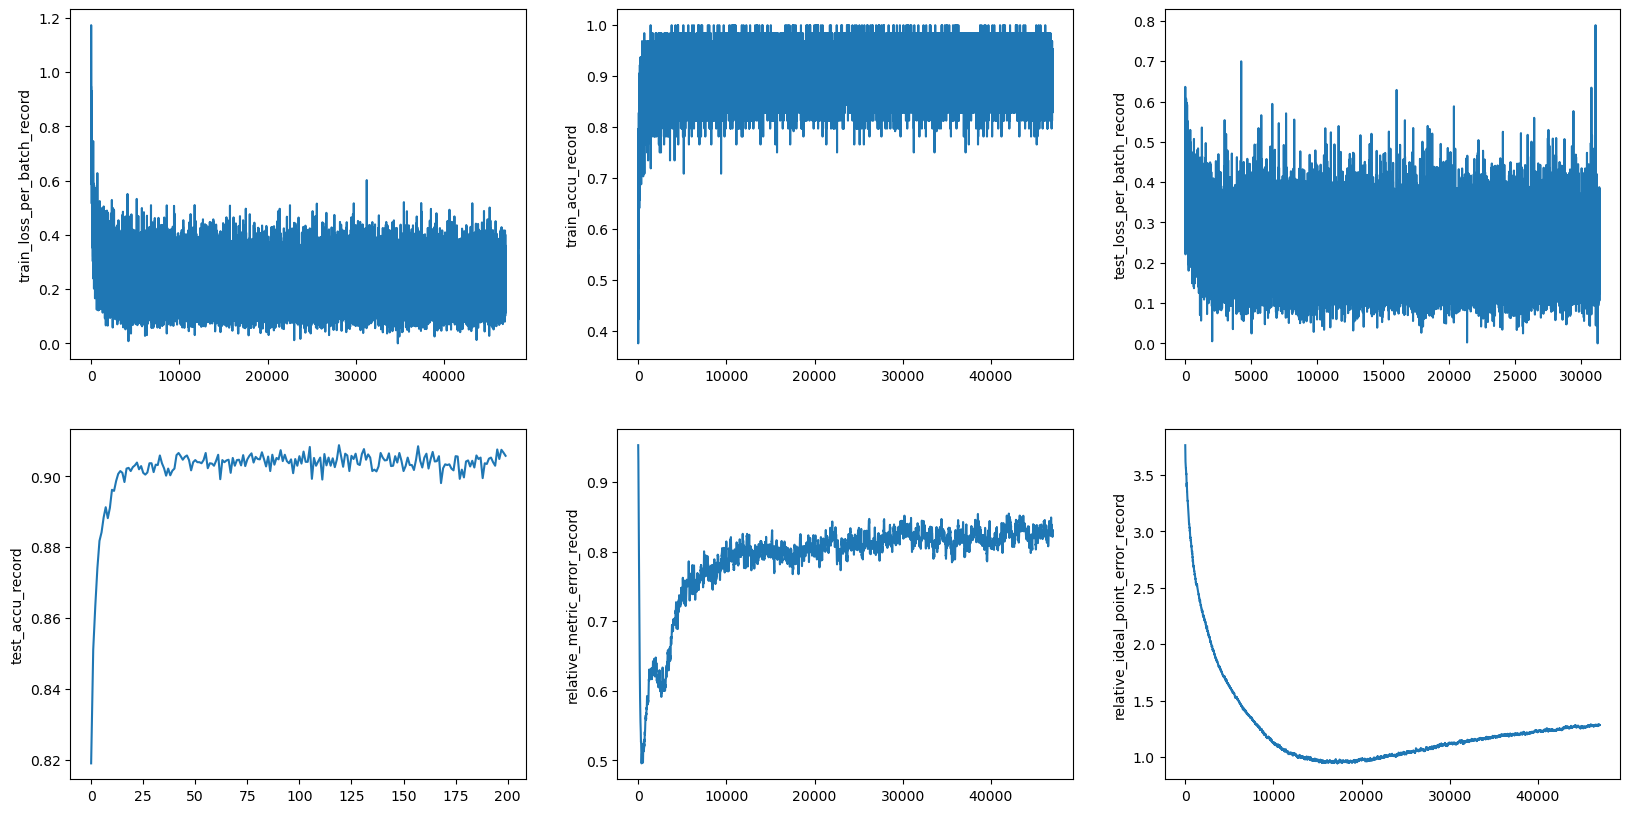

In [108]:
fig,ax = plt.subplots(2,3,figsize=(20,10))
ax_flatten = ax.flatten()
for idx,key in enumerate(res_list[52]['train_stats']):
    ax_flatten[idx].plot(res_list[52]['train_stats'][key])
    ax_flatten[idx].set_ylabel(key)